In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
df = pd.read_csv('data/cleaned_student_lifestyle_dataset.csv')

In [3]:
df.head()

,student_id,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa,stress_level,stress_level_numeric,gpa_group
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,2,2.5-3
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,1,2.5-3
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,1,2.5-3
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,2,2.5-3
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,3,3.5-4


Fit the simple linear regression model

In [5]:
model = ols('study_hours_per_day ~ social_hours_per_day', data=df).fit()

In [6]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     study_hours_per_day   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.019
Method:                  Least Squares   F-statistic:                     38.69
Date:                 Thu, 01 May 2025   Prob (F-statistic):           6.05e-10
Time:                         17:48:10   Log-Likelihood:                -3525.0
No. Observations:                 2000   AIC:                             7054.
Df Residuals:                     1998   BIC:                             7065.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

Create the regression plot

/tmp/ipykernel_239631/2512213755.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"Study time = {model.params[0]:.2f} + ({model.params[1]:.2f}) × Social time"


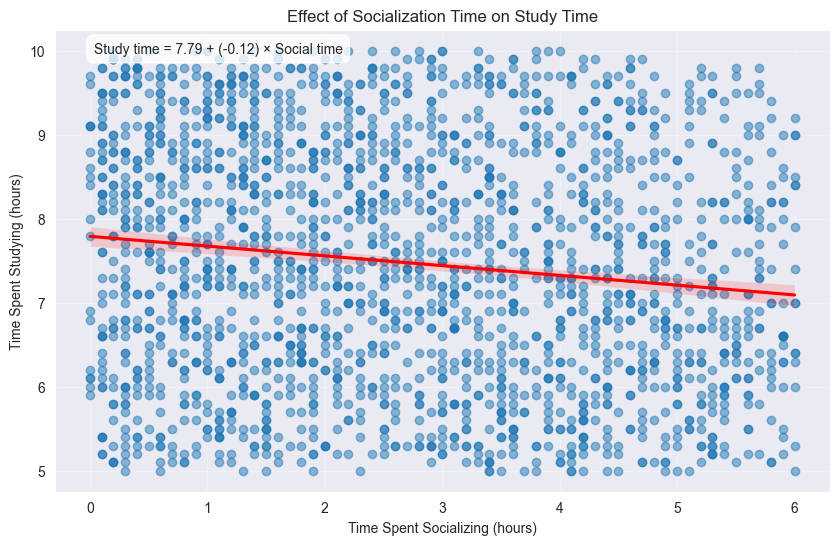

In [12]:
plt.figure(figsize=(10, 6))
sns.regplot(x='social_hours_per_day', y='study_hours_per_day', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Effect of Socialization Time on Study Time')
plt.xlabel('Time Spent Socializing (hours)')
plt.ylabel('Time Spent Studying (hours)')

equation = f"Study time = {model.params[0]:.2f} + ({model.params[1]:.2f}) × Social time"
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
plt.grid(alpha=0.3)
plt.show()

we see that the slope of the regression line is negative, indicating that as the time spent socializing increases, the time spent studying decreases. This suggests a potential trade-off between socialization and study time.
___
However, the graph implies there is no significant correlation between them. In order to confirm this, we run tests

Extract the coefficient information from your existing model

In [13]:
slope = model.params[1]
slope_se = model.bse[1]
t_stat = model.tvalues[1]
p_value = model.pvalues[1]

/tmp/ipykernel_239631/1784548780.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/tmp/ipykernel_239631/1784548780.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_se = model.bse[1]
/tmp/ipykernel_239631/1784548780.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = model.tvalues[1]
/tmp/ipykernel_239631/1784548780.py:4: FutureWarning: Series.__getitem__ treating keys as positions is depr

H0: β₁ = 0 (no effect)
___
H1: β₁ ≠ 0 (there is an effect)

In [14]:
print(f"Slope coefficient (β₁): {slope:.4f}")
print(f"Standard error: {slope_se:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"95% Confidence interval: [{model.conf_int().iloc[1, 0]:.4f}, {model.conf_int().iloc[1, 1]:.4f}]")

Slope coefficient (β₁): -0.1162
Standard error: 0.0187
t-statistic: -6.2198
p-value: 0.0000
95% Confidence interval: [-0.1529, -0.0796]


Reject the null hypothesis since p-value < 0.05. There is a significant effect of social time on study time.

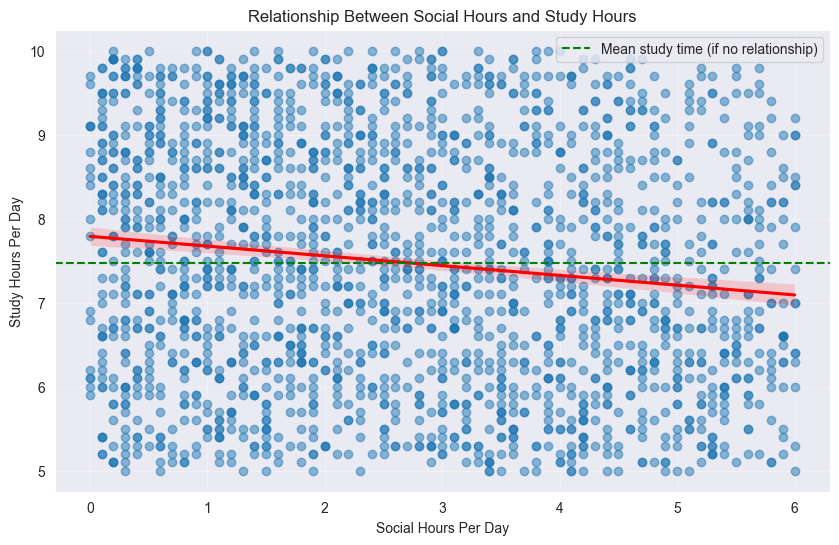

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x='social_hours_per_day', y='study_hours_per_day', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ci=95)

plt.axhline(y=df['study_hours_per_day'].mean(), color='green', linestyle='--',
            label='Mean study time (if no relationship)')

plt.title('Relationship Between Social Hours and Study Hours')
plt.xlabel('Social Hours Per Day')
plt.ylabel('Study Hours Per Day')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

At the first glance, it seemed that there is no significant correlation between social hours and study hours.
___
However, the regression analysis revealed a significant negative relationship. This suggests that as students spend more time socializing, their study time tends to decrease.